### Part I: Research Question

**A. Describe the purpose of this data mining report by doing the following:**

**1. Propose one question relevant to a real-world organizational situation that you will answer by using principal component analysis (PCA).**

A critical component in patient relationship management is understanding the conditions leading to hospital admissions. When a hospital is able to better understand its patients’ characteristics, they are able to target treatment to patients, resulting in more effective cost of care for the hospital in the long term.

In this analysis, the research questions is **what are the key principal components of the dataset?** This analysis will use PCA to analyze the medical data to identify the principal variables of the hospital's patients, ultimately allowing better business and strategic decision-making for the hospital.

**2. Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.**

The goal of the data analysis is to reduce the dimensions of the data set while retaining the information found in the dataframe. This is one of the main objectives of principal component analysis and this is the main goal of the data analysis that will be conducted in this performance assessment.

In the context of our research question, the goal is the reduce the number of variables while retaining the information in our dataset. We are looking to inform what are the key components of predicting readmission when looking at the hospital dataset.

### Part II: Method Justification

**B. Explain the reasons for using PCA by doing the following:**

**1. Explain how PCA analyzes the selected data set. Include expected outcomes.**

PCA (Principal Component Analysis) is a technique used to analyze and transform high-dimensional data into a lower-dimensional space while preserving the most important patterns and structures of the original data. It achieves this by finding a new set of principal components that capture the maximum variance in the data (Loukas, 2020).

The steps involved in PCA analysis are as follows:

* Data Standardization
* Compute Covariance Matrix: PCA involves calculating the covariance matrix of the standardized data. The covariance matrix measures the relationships between each pair of features, indicating how they vary together or move independently.
* Compute Eigenvalues: The eigenvalues indicate the amount of variance
* Select Principal Components: Select the significant principal components

(Loukas, 2020)

A few expected outcomes of PCA analysis are:

* Reduced Dimensionality: PCA reduces the number of dimensions (features) in the data, providing a lower-dimensional representation of the original dataset.

* Explained Variance: Each principal component's corresponding eigenvalue indicates the amount of variance explained by that component. The sum of all eigenvalues represents the total variance explained by all the principal components.


**2. Summarize one assumption of PCA.**

One assumptions of PCA is that PCA assumes that the relationships between variables in the dataset are linear. This entails that a change in one variable is proportional to the changes in the other variables. If the relationships are highly nonlinear, PCA might not accurately capture the underlying structure. (Loukas, 2020).

### Part III: Data Preparation

**C. Perform data preparation for the chosen dataset by doing the following:**

**1. Identify the continuous dataset variables that you will need in order to answer the PCA question proposed in part A1.**

We will be running the analysis on all the continuous variables. The categorical variables will be dropped since PCA can only be conducted on continuous variables. The continuous variables that we will be conducting PCA on is:

* Age
* Income
* VitD_levels
* Doc_visits
* Full_meals_eaten 
* vitD_supp
* Initial_days
* TotalCharge
* Additional_charges
* TimelyAdmission
* TimelyTreatment
* TimelyVisits
* Reliability
* Options
* TreatmentTime
* Courteous
* ActiveListening


**2. Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.**

Please see the below code for the standardization of the dataset. The cleaned data is attached to this performance assessment.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv(r"C:\Users\shabn\Documents\WGU - MSDA\D207\Medical Data - 207\medical_clean.csv")

In [3]:
# we know our data is clean from our last analysis, but let's do a quick check
# Check for missing values
display(df.isnull().any())

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [4]:
# Rename the last 8 columns to reflect what the variables measure

df.rename(columns = {
    'Item1':'TimelyAdmission',
    'Item2':'TimelyTreatment',
    'Item3':'TimelyVisits',
    'Item4':'Reliability',
    'Item5':'Options',
    'Item6':'TreatmentTime',
    'Item7':'Courteous',
    'Item8':'ActiveListening'
}, inplace=True)

df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'TimelyAdmission',
       'TimelyTreatment', 'TimelyVisits', 'Reliability', 'Options',
       'TreatmentTime', 'Courteous', 'ActiveListening'],
      dtype='object')

In [5]:
df = df.drop(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Area',
       'TimeZone', 'CaseOrder', 'Zip', 'Lat', 'Lng','Population'], axis=1)

In [6]:
df.dtypes

Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety                object
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Services               object
Initial_days          float64
TotalCharge           float64
Additional_charges    float64
TimelyAdmission         int64
TimelyTreatment         int64
TimelyVisits            int64
Reliability             int64
Options   

In [7]:
cat_cols = df.select_dtypes(include="object").columns
print(cat_cols)

Index(['Job', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services'],
      dtype='object')


In [8]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   VitD_levels         10000 non-null  float64
 4   Doc_visits          10000 non-null  int64  
 5   Full_meals_eaten    10000 non-null  int64  
 6   vitD_supp           10000 non-null  int64  
 7   Initial_days        10000 non-null  float64
 8   TotalCharge         10000 non-null  float64
 9   Additional_charges  10000 non-null  float64
 10  TimelyAdmission     10000 non-null  int64  
 11  TimelyTreatment     10000 non-null  int64  
 12  TimelyVisits        10000 non-null  int64  
 13  Reliability         10000 non-null  int64  
 14  Options             10000 non-null  int64  
 15  TreatmentTime       10000 non-null  int64  
 16  Court

In [9]:
#create object
scaler = StandardScaler()

# calculate the mean and standard deviation
scaler.fit(df_num)
d_scaled = scaler.transform(df_num)

In [10]:
df_prepared = pd.DataFrame(d_scaled)

In [11]:
df_prepared = pd.DataFrame(d_scaled,
                   columns=df_num.columns)

In [12]:
df_prepared.to_csv('prepared_dataset_PCA.csv')

### Part IV: Analysis

**D. Perform PCA by doing the following:**

**1. Determine the matrix of all the principal components.**

Please see the below code for the matrix of all 18 principal components. Please note that we will be using the 18 continuous variable in the dataset in our PCA.

**2. Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.**

The image below includes a screenshot of the scree plot analysis that was conducted in our code below. As shown, the scree plot does not have a prominent "elbow". As such, we will use the Kaiser criterion. The Kaiser criterion suggests to retain only those principal components with eigenvalues greater than 1. In our case, the **first 7 principal components** have an eigenvalue above 1.

![image](explained_var.png)

**3. Identify the variance of each of the principal components identified in part D2.**

The values below are the results of the calculated variance of the 7 principal components in our analysis.

Captured Variance per PC:
* PC1: 16.41
* PC2: 11.08
* PC3: 9.53
* PC4: 9.17
* PC5: 5.80
* PC6: 5.64
* PC7: 5.58

**4. Identify the total variance captured by the principal components identified in part D2.**

The values below are the results of the calculated total variance of the 7 principal components in our analysis.

* The variance explained by the first principal component is  16.41481705258967
* The variance explained by the first 2 principal component is  27.490707870311194
* The variance explained by the first 3 principal component is  37.023224779084714
* The variance explained by the first 4 principal component is  46.18836314103643
* The variance explained by the first 5 principal component is  51.984645102787226
* The variance explained by the first 6 principal component is  57.620608888895774
* The variance explained by the first 7 principal component is  63.20202677033761


**5. Summarize the results of your data analysis.**

Initially, we started with 18 continuous variables from our dataset. Our research goal for this performance assessment was to reduce the dimensions of the dataset while retaining as much as variance as possible.

For the analysis, we scaled the data and conducted PCA to all 18 variables that explained 100% of the variance. Then we were able to reduce the principal components down to 7 to explain 63.2% variance of the data. We used the Kaiser criterion for the variable reduction as the scree plot did not show a significant elbow. The Kaiser criterion suggests to remove variables that have an eigenvalue less than 1. 

The findings of this analysis is that we are able to reduce our dataset from 18 key principals to 7 key principals while maintaining 63.2% of the variance. In an ideal situation, we would have a scree plot with a prominent elbow and a higher variance of the principal components. However, perfect data is not a realistic expection when analyzing real world data. In this situation, I would either suggest the hospital to consider collecting additional numerical data from patients in the hospital to  help improve the variance of the data. Additionally, if the hospital is content with 63.2% variance, I would strongly suggest the hospital to accept the PCA conducted below. I would consider a reduction of 11 variables while maintaining > 60% of the variance quite successful, especially considering that we are working with real world data.

In [13]:
# apply PCA to all 18 features to explain variance

print(d_scaled)

[[-0.50712929 -0.02479466  1.61591429 ... -0.50613933 -0.48367167
   0.47042005]
 [ 0.417277   -0.1217056   0.22144303 ...  0.46254838 -0.48367167
  -0.48903345]
 [ 0.417277   -0.02479466 -0.91586974 ...  0.46254838 -0.48367167
  -0.48903345]
 ...
 [ 0.417277   -0.4124384   0.89156936 ... -1.47482704 -0.48367167
  -1.44848694]
 [ 0.417277   -0.50934933 -0.37827063 ... -0.50613933  0.49542078
  -0.48903345]
 [ 2.72829274  0.79894828  0.77813279 ...  2.39992381  0.49542078
  -0.48903345]]


In [14]:
pca_18 = PCA(n_components=18, random_state=8)
pca_18.fit(d_scaled)
pc = pca_18.transform(d_scaled)

In [15]:
pc_df = pd.DataFrame(pc, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
                                  'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])
print(pc_df)

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.505084 -1.181287  0.570377  0.472412 -0.914580  1.570462  0.020273   
1    -0.356835 -0.820477  0.563666  0.076196  0.573736 -0.253713  0.149692   
2    -0.190424 -1.634885  0.755816 -0.492825  0.794464 -1.030544  0.581742   
3     2.431361 -1.721391  0.902080  0.619946 -0.340789 -1.233197  0.515518   
4    -2.398354 -2.146199 -1.742287 -0.318475 -1.344504 -1.087936 -1.879737   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -2.140588  0.720389 -1.417749 -0.371072  0.122069 -0.639413  0.211084   
9996 -0.675083  2.087913  2.381007  1.757337 -0.008288 -0.162807  0.478707   
9997 -1.960104  1.795409 -0.269831  0.130746  0.566053 -0.120292  1.455438   
9998  0.793664  1.453031 -1.119977  0.742974  1.032744  0.240714 -0.711934   
9999  0.602594  2.002895  0.205215  0.037878 -0.531533  1.536622  1.207318   

           PC8       PC9      PC10      PC11      PC12      PC1

In [16]:
load = pd.DataFrame(pca_18.components_.T,
                   columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
                                  'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'],
                           index=df_num.columns)

load

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
Children,-0.005468,0.034246,0.015507,0.020320,0.182388,0.364556,0.543271,0.656466,-0.156957,0.274578,0.066942,0.027701,0.017271,-0.016804,-0.002689,0.002468,0.003845,-0.000882
Age,0.006763,0.088107,0.694345,0.090880,-0.026319,-0.011854,0.010859,-0.017860,-0.012404,-0.019072,-0.005715,0.016331,-0.001836,0.008224,-0.019968,-0.001243,0.706092,0.026315
Income,0.001172,-0.020295,-0.016507,-0.021912,-0.358313,0.552365,0.389354,-0.252797,0.446578,-0.377351,-0.086916,-0.009903,-0.006476,0.017156,0.001202,0.003711,0.002065,0.001249
VitD_levels,-0.003371,-0.002448,0.017814,0.027418,0.539479,0.301229,-0.356552,0.237025,-0.035558,-0.653772,0.049681,0.004125,-0.041478,-0.014669,-0.021322,0.016166,-0.002497,-0.001494
Doc_visits,0.007150,-0.006528,0.016456,-0.004247,-0.087485,0.683708,-0.463749,-0.216112,-0.271008,0.433009,-0.016151,0.027993,-0.024302,0.007165,-0.010253,-0.002064,0.000751,-0.001117
Full_meals_eaten,-0.000346,-0.019997,0.028403,0.028778,0.598847,0.029837,0.013509,-0.208424,0.659224,0.395168,0.048839,0.034520,-0.010613,0.001986,0.017040,0.001130,0.010550,-0.001575
vitD_supp,-0.005026,0.024717,0.014299,0.005546,-0.410215,-0.024789,-0.457143,0.587938,0.515364,0.086778,0.038400,-0.026453,0.012649,-0.004023,0.010197,-0.000019,0.001094,-0.000601
Initial_days,-0.026574,0.699450,-0.093208,-0.010295,0.007813,0.004013,-0.003332,-0.031898,0.009824,-0.006445,-0.004257,0.011043,0.001211,0.002644,-0.000845,-0.005506,0.031532,-0.706295
TotalCharge,-0.024984,0.700695,-0.082696,-0.008886,0.010817,0.005272,-0.004776,-0.030524,0.010607,-0.004850,-0.005338,0.008997,-0.000447,0.003539,-0.000543,-0.006864,-0.031531,0.706460
Additional_charges,0.006213,0.088322,0.695258,0.086279,-0.020027,-0.006817,0.015233,-0.019869,-0.002301,-0.010435,0.007457,-0.001018,0.009657,0.003155,0.010637,0.004323,-0.706046,-0.036749


In [17]:
print("Variance explained by the 18 numerical components of the dataframe = ", sum(pca_18.explained_variance_ratio_*100))

Variance explained by the 18 numerical components of the dataframe =  100.0


In [18]:
pca_18.explained_variance_ratio_*100

array([16.41481705, 11.07589082,  9.53251691,  9.16513836,  5.79628196,
        5.63596379,  5.58141788,  5.53077152,  5.41666094,  5.38436518,
        4.27144336,  3.87755116,  3.26589449,  2.96371385,  2.62957353,
        1.81874122,  1.57422249,  0.06503549])

In [19]:
varex1 = pca_18.explained_variance_ratio_*100
var_df1 = pd.DataFrame(varex1.round(2), columns=['Captured Variance Per PC'], index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
                                  'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])
var_df1

,Captured Variance Per PC
PC1,16.41
PC2,11.08
PC3,9.53
PC4,9.17
PC5,5.80
PC6,5.64
PC7,5.58
PC8,5.53
PC9,5.42
PC10,5.38


In [20]:
eigenvalues = pca_18.explained_variance_
eigen_df = pd.DataFrame(eigenvalues.round(4), columns=['Eigenvalue Per PC'], index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 
                                  'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18'])

eigen_df

,Eigenvalue Per PC
PC1,2.9550
PC2,1.9939
PC3,1.7160
PC4,1.6499
PC5,1.0434
PC6,1.0146
PC7,1.0048
PC8,0.9956
PC9,0.9751
PC10,0.9693


In [21]:
# cummulative sum of the array is explained by the following percentages

np.cumsum(pca_18.explained_variance_ratio_*100)

array([ 16.41481705,  27.49070787,  37.02322478,  46.18836314,
        51.9846451 ,  57.62060889,  63.20202677,  68.73279829,
        74.14945924,  79.53382442,  83.80526778,  87.68281894,
        90.94871342,  93.91242728,  96.54200081,  98.36074203,
        99.93496451, 100.        ])

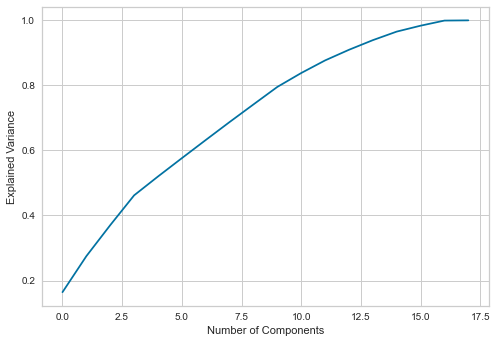

In [22]:
# scree plot
n_features = 100

plt.plot(np.cumsum(pca_18.explained_variance_ratio_))


plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.savefig('explained_var.png', dpi=70)

In [23]:
print('The variance explained by the first principal component is ', np.cumsum(pca_18.explained_variance_ratio_ * 100)[0])

print('The variance explained by the first 2 principal component is ', np.cumsum(pca_18.explained_variance_ratio_ * 100)[1])

print('The variance explained by the first 3 principal component is ', np.cumsum(pca_18.explained_variance_ratio_ * 100)[2])

print('The variance explained by the first 4 principal component is ', np.cumsum(pca_18.explained_variance_ratio_ * 100)[3])

print('The variance explained by the first 5 principal component is ', np.cumsum(pca_18.explained_variance_ratio_ * 100)[4])

print('The variance explained by the first 6 principal component is ', np.cumsum(pca_18.explained_variance_ratio_ * 100)[5])

print('The variance explained by the first 7 principal component is ', np.cumsum(pca_18.explained_variance_ratio_ * 100)[6])


The variance explained by the first principal component is  16.41481705258967
The variance explained by the first 2 principal component is  27.490707870311194
The variance explained by the first 3 principal component is  37.023224779084714
The variance explained by the first 4 principal component is  46.18836314103643
The variance explained by the first 5 principal component is  51.984645102787226
The variance explained by the first 6 principal component is  57.620608888895774
The variance explained by the first 7 principal component is  63.20202677033761


In [24]:
# we will consider PC with an eigenvalue >= 1

pc7 = PCA(n_components=7, random_state=8)
pc7.fit(d_scaled)
var_pca7 = pc7.transform(d_scaled)

pca_7= pc7.explained_variance_ratio_*100
var_df1 = pd.DataFrame(pca_7.round(2), columns=['Captured Variance per PC'], index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

var_df1

,Captured Variance per PC
PC1,16.41
PC2,11.08
PC3,9.53
PC4,9.17
PC5,5.80
PC6,5.64
PC7,5.58


In [25]:
# the matrix of all the 18 principal components 

principal_components_matrix = pca_18.components_

print("Matrix of Principal Components:")
print(principal_components_matrix)

Matrix of Principal Components:
[[-5.46788825e-03  6.76307413e-03  1.17235442e-03 -3.37063889e-03
   7.14979476e-03 -3.46019799e-04 -5.02643512e-03 -2.65737237e-02
  -2.49835788e-02  6.21312418e-03  4.54535735e-01  4.28086117e-01
   3.95018496e-01  1.52457258e-01 -1.90294449e-01  4.10255024e-01
   3.56409710e-01  3.12688102e-01]
 [ 3.42457198e-02  8.81067992e-02 -2.02945821e-02 -2.44789078e-03
  -6.52829720e-03 -1.99974428e-02  2.47167491e-02  6.99449557e-01
   7.00694563e-01  8.83216703e-02  7.08146698e-03  1.73830098e-02
   1.23978023e-02 -6.27576101e-04 -9.64687032e-03  1.30072614e-02
   2.68901773e-02  9.90491640e-03]
 [ 1.55070613e-02  6.94345123e-01 -1.65071965e-02  1.78143948e-02
   1.64558544e-02  2.84027778e-02  1.42987226e-02 -9.32082943e-02
  -8.26960781e-02  6.95258428e-01 -4.07267500e-02 -4.18663533e-02
  -4.46052486e-02  6.62918390e-02 -7.88892505e-02  9.01760831e-03
   2.65584848e-02  7.48237403e-03]
 [ 2.03197554e-02  9.08804223e-02 -2.19121151e-02  2.74177569e-02
  -4.

### Part V: Attachments

**E. Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.**
 

**F. Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.**
 
Serafeim Loukas, PhD. “PCA Clearly Explained - How, When, Why to Use It and Feature Importance: A Guide in Python.” Medium, 21 July 2023, towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e. 

**G. Demonstrate professional communication in the content and presentation of your submission.**